In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", header=None)

In [34]:
print(df)
df.columns

           0  1      2      3       4       5        6        7        8   \
0      842302  M  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.30010   
1      842517  M  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.08690   
2    84300903  M  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.19740   
3    84348301  M  11.42  20.38   77.58   386.1  0.14250  0.28390  0.24140   
4    84358402  M  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.19800   
..        ... ..    ...    ...     ...     ...      ...      ...      ...   
564    926424  M  21.56  22.39  142.00  1479.0  0.11100  0.11590  0.24390   
565    926682  M  20.13  28.25  131.20  1261.0  0.09780  0.10340  0.14400   
566    926954  M  16.60  28.08  108.30   858.1  0.08455  0.10230  0.09251   
567    927241  M  20.60  29.33  140.10  1265.0  0.11780  0.27700  0.35140   
568     92751  B   7.76  24.54   47.92   181.0  0.05263  0.04362  0.00000   

          9   ...      22     23      24      25       26       27      28 

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int64')

In [35]:
df[1]= df[1].map({"M": 1 , "B": 0})
x = df[[2,3,4,5,6,7,8,9,10]].values
y = df[1].values

In [40]:
class LogisticRegression:
    def __init__(self,lr=0.001,epochs=1000):
        self.lr = lr
        self.epochs =epochs
        self.weight = None
        self.bias = None
        self.losses = []
    def fit(self,X,y):
        n_samples,n_features = X.shape
        np.random.seed(42)
        self.weight = np.random.randn(n_features)
        self.bias = np.random.randn()
        X =(X-X.mean())/ X.std()
        for _ in range(self.epochs):
            linear_model_output = np.dot(X, self.weight) + self.bias
            y_predicted = self._sigmoid(linear_model_output)
            error = y_predicted - y

            gradient_weight = (1/n_samples)*np.dot(X.T, error)
            gradient_bias = (1/n_samples)*np.sum(error)

            self.weight -= self.lr * gradient_weight
            self.bias -= self.lr * gradient_bias

            loss =  - np.mean(y*np.log(y_predicted)+(1-y)*np.log(1-y_predicted))
            self.losses.append(loss)


    def predict(self, X):
        X =(X-X.mean())/ X.std()
        linear_model_output = np.dot(X,self.weight) + self.bias
        y_predicted = self._sigmoid(linear_model_output)
        return y_predicted
    def _sigmoid(self,z):
        z = np.clip(z,-500,500)
        return 1/(1+np.exp(-z))


In [66]:
model = LogisticRegression(0.1,2000)
model.fit(x,y)

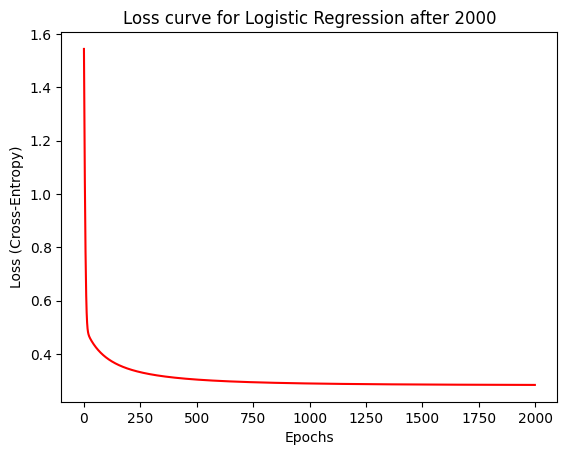

In [67]:
plt.plot(model.losses, color='red')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.show()

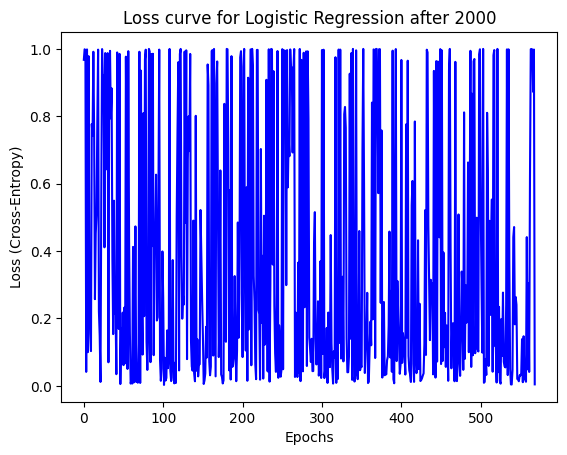

In [68]:
plt.plot(model.predict(x), color='blue')
plt.xlabel("Epochs")
plt.ylabel("Loss (Cross-Entropy)")
plt.title(f"Loss curve for Logistic Regression after {model.epochs}")
plt.show()